In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
import torch
from pathlib import Path

##### File paths of trained models

In [52]:
save_dir = Path("../training_outputs/")
paths = sorted([p for p in save_dir.glob("*.pt")], reverse=True)

n_1 = 0
n_2 = 5
paths = paths[n_1:n_2]

Trial 0: lr = 0.0001, graph channels = [256, 512], linear channels = [256], Continuation, relu.
Trial 1: lr = 1e-05, graph channels = [256, 512], linear channels = [256], Continuation, relu.
Trial 2: lr = 0.0001, graph channels = [256, 512], linear channels = [256], Mean pool, no real embedding, tanh. Not scaled loss. Nested.
Trial 3: lr = 0.0001, graph channels = [256, 512], linear channels = [256], Mean pool, no real embedding, relu. Not scaled loss. Nested.
Trial 4: lr = 0.0001, graph channels = [256, 512], linear channels = [256], Mean pool, no real embedding, relu. Not scaled loss. Nested.


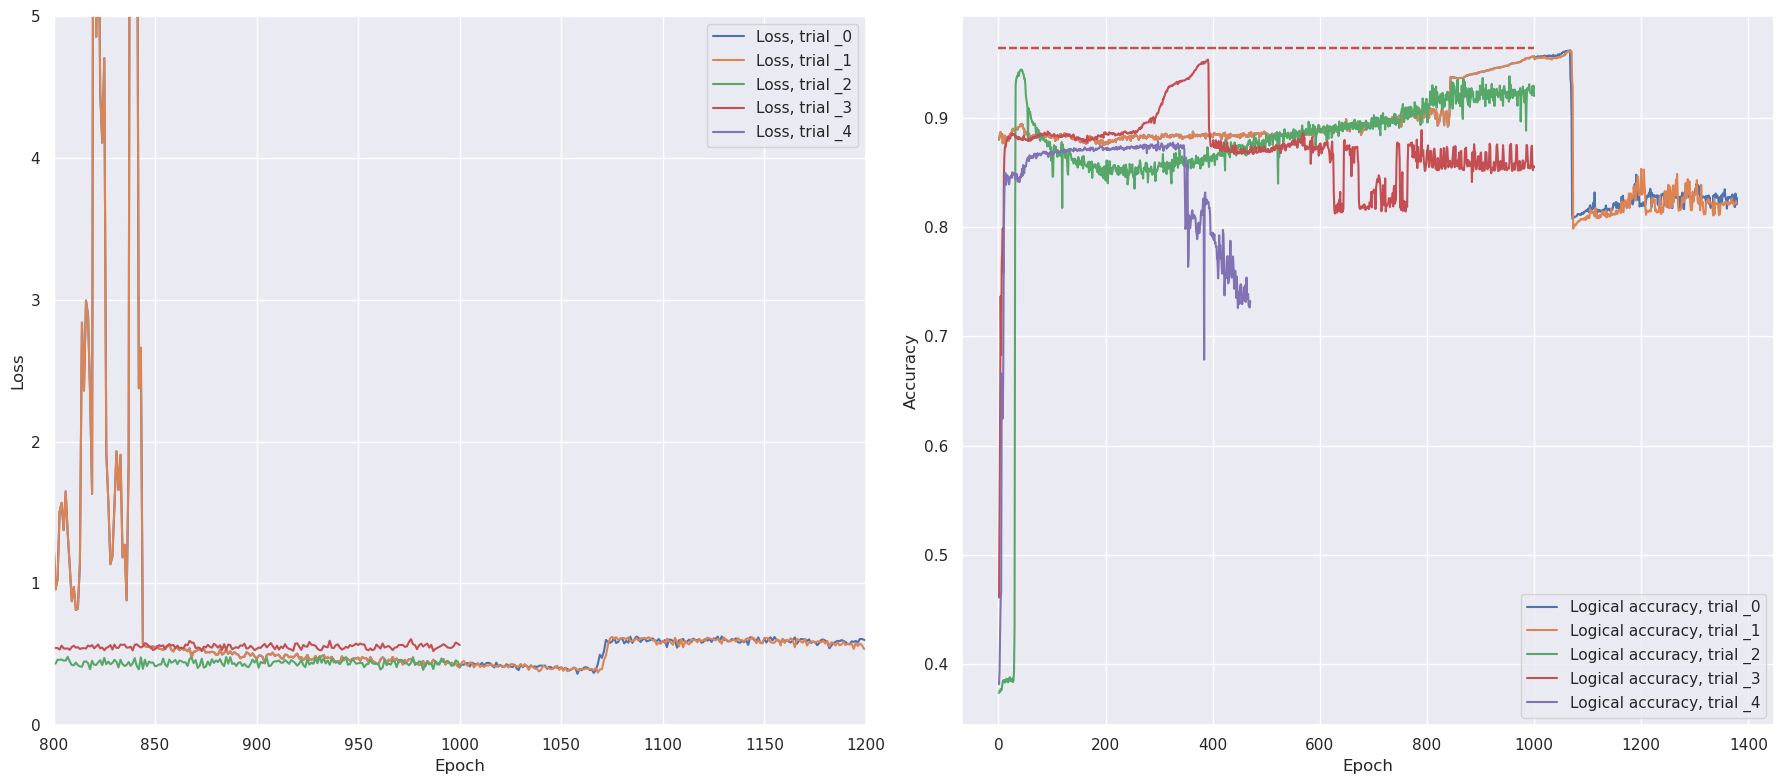

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
colors = sns.color_palette(None, len(paths))

for i, (path, c) in enumerate(zip(paths, colors)):

    training_data = torch.load(path, map_location="cpu")

    history = training_data["training_history"]
    settings = training_data["training_settings"]
    
    # remove too high learning rates for now
    if settings['lr'] > 0.0001:
        print("Skipped file with learning rate > 0.0001")
        continue
    
    if "model_settings" in training_data:
        model_settings = training_data["model_settings"]
        print(f"Trial {i}: lr = {settings['lr']}, graph channels = {model_settings['hidden_channels_GCN']}, linear channels = {model_settings['hidden_channels_MLP']}, {settings['comment']}")
    else:
        print(f"Trial {i}: lr = {settings['lr']}, {settings['comment']}")

    train_loss = history["train_loss"]
    val_accuracy = history["val_accuracy"]
    n_epochs = history["epoch"] + 1
    x = range(1, n_epochs + 1)
    ax[0].plot(
        x, train_loss, color=c, label=f"Loss, trial _{i}"
    )
    ax[1].plot(
        x,
        val_accuracy,
        color=c,
        label=f"Logical accuracy, trial _{i}",
    )
    
    ax[0].set_ylabel("Loss")
    ax[0].set_xlabel("Epoch")
    ax[0].legend()
    ax[0].set_ylim([0, 5])
    ax[0].set_xlim([800, 1200])
    ax[1].hlines(0.9635184434535874, 0, 1000, colors="r", ls="--")
    ax[1].set_ylabel("Accuracy")
    ax[1].set_xlabel("Epoch")
    ax[1].legend()
    # ax[1].set_ylim([0.8, 1.])
    # ax[1].set_xlim([1000, 1200])
    plt.tight_layout()
    

##### Run inference


../training_outputs/d5_d_t_5_240320-141138.pt
../training_outputs/d5_d_t_5_240324-114251_load_f_d5_d_t_5_240320-141138.pt

In [48]:
pp = ["../training_outputs/d5_d_t_5_240320-141138.pt", "../training_outputs/d5_d_t_5_240324-114251_load_f_d5_d_t_5_240320-141138.pt"]
for p in pp:
    data = torch.load(p, map_location="cpu")
    history = data["training_history"]
    print(history["best_val_accuracy"], history["val_accuracy"][-1])

0.9562817002558464 0.9562817002558464
0.9611301061723951 0.8216663667446464


In [42]:
model_path = paths[3]
!python ../scripts/inference.py -f {model_path}

Moved model to cpu and loaded pre-trained weights.
                 True 0  True 1
Predicted 0 (%)   94.97    0.33
Predicted 1 (%)    5.03   99.67
                 True 0  True 1
Predicted 0 (%)   94.76    0.33
Predicted 1 (%)    5.24   99.67
                 True 0  True 1
Predicted 0 (%)   94.79     1.0
Predicted 1 (%)    5.21    99.0
                 True 0  True 1
Predicted 0 (%)   94.58     0.0
Predicted 1 (%)    5.42   100.0
                 True 0  True 1
Predicted 0 (%)   95.53     0.0
Predicted 1 (%)    4.47   100.0
                 True 0  True 1
Predicted 0 (%)   95.32    0.36
Predicted 1 (%)    4.68   99.64
                 True 0  True 1
Predicted 0 (%)   95.69    0.33
Predicted 1 (%)    4.31   99.67
                 True 0  True 1
Predicted 0 (%)    95.5    0.36
Predicted 1 (%)     4.5   99.64
                 True 0  True 1
Predicted 0 (%)   95.85    0.68
Predicted 1 (%)    4.15   99.32
                 True 0  True 1
Predicted 0 (%)   95.02     0.0
Predicted 1 (%)    4.